#  Loan Defaulter Prediction 

## Supervised Learning Hands-on session

# Loading Dataset using pandas

In [1]:
#for handling dataset
import numpy as np

#additional array-based functionality
import pandas as pd

#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#for manipulating dates and times
import datetime as dt


In [2]:
#Load the dataset into memory from secondary memory to primary memory
data = pd.read_csv("LoanStats.csv", encoding="Latin-1", low_memory=False)

print("Dataset loaded in memory...")

#set the maximum column display limit to 50
pd.set_option('display.max_columns', 50)

Dataset loaded in memory...


In [3]:
data=data.iloc[0:2000]

In [4]:
data.shape

(2000, 41)

# Row display operations

In [5]:
#displaying profiles of any given index
i=0
print("Details of "+str(i)+"th profile from the dataset :\n\nAttributes\n")
print(data.iloc[i])

Details of 0th profile from the dataset :

Attributes

Loan ID                                                                                87023
Amount Requested                                                                        7500
Amount Funded By Investors                                                              7500
Interest Rate                                                                         13.75%
Loan Length                                                                        36 months
Application Date                                                                  2007-06-07
Application Expiration Date                                                       2007-06-21
Issued Date                                                                       2007-06-27
CREDIT Grade                                                                              E2
Loan Title                                                                Consolidation Loan
Loan Purpose   

In [6]:
#display first 5 records 

print("Display the starting 5 profiles from the dataset :")
data.head()

Display the starting 5 profiles from the dataset :


,Loan ID,Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Application Date,Application Expiration Date,Issued Date,CREDIT Grade,Loan Title,Loan Purpose,Loan Description,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal Funded by Investors,Payments To Date (Funded by investors),Remaining Principal,Payments To Date,Screen Name,City,State,Home Ownership,Monthly Income,FICO Range,Earliest CREDIT Line,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquent Amount,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Education,Employment Length,Code
0,87023,7500.0,7500.0,13.75%,36 months,2007-06-07,2007-06-21,2007-06-27,E2,Consolidation Loan,debt_consolidation,"I plan to consolidate over $7,000 of debt: a c...",255.43,Fully Paid,7500.0,14.29%,0.0,9194.98,0.0,9194.98,Kingtrite,Attleboro,MA,OWN,1833.33,660-678,2003-10-27,7.0,8.0,4175.0,51.5%,0.0,0.0,0.0,1.0,11.0,0.0,0.0,NaN,< 1 year,NaN
1,90376,5000.0,5000.0,7.43%,36 months,2007-06-12,2007-06-26,2007-07-02,A2,JAL Loan,other,NaN,155.38,Fully Paid,5000.0,3.72%,0.0,5174.16,0.0,5174.16,Laguna,Rockville,MD,MORTGAGE,16666.67,780+,1988-11-19,17.0,26.0,85607.0,0.7%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN
2,90395,5000.0,5000.0,8.07%,36 months,2007-06-12,2007-06-26,2007-07-02,A4,MBA Loan Consolidation,debt_consolidation,NaN,156.84,Fully Paid,5000.0,2.3%,0.0,5272.08,0.0,5272.08,MGDesousa,Framingham,MA,MORTGAGE,8333.33,714-749,1998-10-28,11.0,20.0,9698.0,19.4%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN
3,90665,8500.0,8500.0,10.28%,36 months,2007-06-13,2007-06-27,2007-07-03,C1,Retiring credit card debt,credit_card,The rate of interest and fees incurred by carr...,275.38,Fully Paid,8500.0,6.4%,0.0,9912.49,0.0,9912.49,Radiothermal,Greensboro,NC,RENT,1500.00,679-713,1986-12-30,6.0,9.0,8847.0,26.9%,1.0,0.0,0.0,1.0,5.0,0.0,0.0,NaN,3 years,NaN
4,92187,2500.0,2500.0,8.07%,36 months,2007-06-15,2007-06-29,2007-07-05,A4,Home Improvement,home_improvement,Our current gutter system on our home is old a...,78.42,Fully Paid,2500.0,11.33%,0.0,2822.72,0.0,2822.72,PMJ7671,Lakewood,CO,MORTGAGE,9166.67,750-779,1990-11-11,13.0,40.0,7274.0,13.1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4 years,NaN


In [7]:
#display selected rows from the dataset
print("Selecting particular rows from the dataset : ")
data.loc[(data['Amount Requested'] > 7000)].head(3)
# data.loc[(data['CREDIT Grade'] == 'A2') | (data['CREDIT Grade'] == 'B2')].head(3)

Selecting particular rows from the dataset : 


,Loan ID,Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Application Date,Application Expiration Date,Issued Date,CREDIT Grade,Loan Title,Loan Purpose,Loan Description,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal Funded by Investors,Payments To Date (Funded by investors),Remaining Principal,Payments To Date,Screen Name,City,State,Home Ownership,Monthly Income,FICO Range,Earliest CREDIT Line,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquent Amount,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Education,Employment Length,Code
0,87023,7500.0,7500.0,13.75%,36 months,2007-06-07,2007-06-21,2007-06-27,E2,Consolidation Loan,debt_consolidation,"I plan to consolidate over $7,000 of debt: a c...",255.43,Fully Paid,7500.0,14.29%,0.0,9194.98,0.0,9194.98,Kingtrite,Attleboro,MA,OWN,1833.33,660-678,2003-10-27,7.0,8.0,4175.0,51.5%,0.0,0.0,0.0,1.0,11.0,0.0,0.0,NaN,< 1 year,NaN
3,90665,8500.0,8500.0,10.28%,36 months,2007-06-13,2007-06-27,2007-07-03,C1,Retiring credit card debt,credit_card,The rate of interest and fees incurred by carr...,275.38,Fully Paid,8500.0,6.4%,0.0,9912.49,0.0,9912.49,Radiothermal,Greensboro,NC,RENT,1500.00,679-713,1986-12-30,6.0,9.0,8847.0,26.9%,1.0,0.0,0.0,1.0,5.0,0.0,0.0,NaN,3 years,NaN
19,101579,10000.0,10000.0,10.28%,36 months,2007-06-27,2007-07-11,2007-07-17,C1,Web Design Business Expansion Loan,small_business,Seven months ago I decided to drop everything ...,323.98,Fully Paid,10000.0,10.7%,0.0,11662.13,0.0,11662.13,WebDev,Fort Collins,CO,RENT,2281.33,679-713,2003-09-17,4.0,4.0,3534.0,54.4%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Loan ID                                  2000 non-null   object 
 1   Amount Requested                         2000 non-null   float64
 2   Amount Funded By Investors               2000 non-null   float64
 3   Interest Rate                            2000 non-null   object 
 4   Loan Length                              2000 non-null   object 
 5   Application Date                         2000 non-null   object 
 6   Application Expiration Date              2000 non-null   object 
 7   Issued Date                              2000 non-null   object 
 8   CREDIT Grade                             2000 non-null   object 
 9   Loan Title                               1999 non-null   object 
 10  Loan Purpose                             2000 no

# Selecting the required rows

## Transforming "Status" values

In [9]:
#Display the unique values in the attribute of Loan status

print("Display unique values from the attribute \"Status\":\n")
i=1
for item in data.Status.unique():
    print(i,item)
    i+=1

Display unique values from the attribute "Status":

1 Fully Paid
2 Charged Off
3 Late (31-120 days)
4 Performing Payment Plan
5 Default
6 In Grace Period
7 Current
8 Late (16-30 days)


In [10]:
#remove all other records except the  'Fully paid' and 'Charged off' records
data_with_loanstatus_sliced = data[(data['Status']=="Fully Paid") | (data['Status']=="Charged Off") | (data['Status']=='Does not meet the current credit policy  Status: Fully Paid') | (data['Status']=='Does not meet the current credit policy  Status: Charged Off') | (data['Status']=="Current")]

#map Fully paid class value to 0, and Charged off class value to 1
di = {"Fully Paid":0, "Charged Off":2, 'Does not meet the current credit policy  Status: Fully Paid':0, 'Does not meet the current credit policy  Status: Charged Off':2, 'Current':1} 
data= data_with_loanstatus_sliced.replace({"Status": di})

In [11]:
#print the new unique values of the attribute

print("Unique values in \"Status\" attibute : \n",data['Status'].value_counts())

print("\nCurrent shape of dataset :",data.shape)

Unique values in "Status" attibute : 
 0    1368
2     305
1     295
Name: Status, dtype: int64

Current shape of dataset : (1968, 41)


In [12]:
print("Values of the status column :")
print(data['Status'])

Values of the status column :
0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    0
1999    0
Name: Status, Length: 1968, dtype: int64


# The float64 type attributes

## Attributes with no changes required

In [13]:
print("Sample values in the attribute - Amount Funded By Investors\n")
print(data['Amount Funded By Investors'])

Sample values in the attribute - Amount Funded By Investors

0        7500.00
1        5000.00
2        5000.00
3        8500.00
4        2500.00
          ...   
1995     9649.47
1996     8210.44
1997     5515.83
1998    10775.00
1999     5000.00
Name: Amount Funded By Investors, Length: 1968, dtype: float64


In [14]:
#all the float64 type of attributes

print("Monthly PAYMENT : ", end='')
print(data['Monthly PAYMENT'].dtype)

print("Monthly Income : ", end='')
print(data['Monthly Income'].dtype)

print("Open CREDIT Lines : ", end='')
print(data['Open CREDIT Lines'].dtype)

print("Total CREDIT Lines : ", end='')
print(data['Total CREDIT Lines'].dtype)

print("Revolving CREDIT Balance : ", end='')
print(data['Revolving CREDIT Balance'].dtype)

print("Inquiries in the Last 6 Months : ", end='')
print(data['Inquiries in the Last 6 Months'].dtype)

print("Delinquencies (Last 2 yrs) : ", end='')
print(data['Delinquencies (Last 2 yrs)'].dtype)

print("Public Records On File : ", end='')
print(data['Public Records On File'].dtype)

print("Months Since Last Record : ", end='')
print(data['Months Since Last Record'].dtype)

print("Amount Requested : ", end='')
print(data['Amount Requested'].dtype)

print("Total Amount Funded :", end='')
print(data['Total Amount Funded'].dtype)

print("Remaining Principal Funded by Investors :", end='')
print(data['Remaining Principal Funded by Investors'].dtype)

print("Payments To Date (Funded by investors) :", end='')
print(data['Payments To Date (Funded by investors)'].dtype)

print("Remaining Principal :", end='')
print(data['Remaining Principal '].dtype)

print("Payments To Date :", end='')
print(data[' Payments To Date'].dtype)

print("Accounts Now Delinquent :", end='')
print(data['Accounts Now Delinquent'].dtype)

print("Delinquent Amount :", end='')
print(data['Delinquent Amount'].dtype)

print("Months Since Last Delinquency :", end='')
print(data['Months Since Last Delinquency'].dtype)

Monthly PAYMENT : float64
Monthly Income : float64
Open CREDIT Lines : float64
Total CREDIT Lines : float64
Revolving CREDIT Balance : float64
Inquiries in the Last 6 Months : float64
Delinquencies (Last 2 yrs) : float64
Public Records On File : float64
Months Since Last Record : float64
Amount Requested : float64
Total Amount Funded :float64
Remaining Principal Funded by Investors :float64
Payments To Date (Funded by investors) :float64
Remaining Principal :float64
Payments To Date :float64
Accounts Now Delinquent :float64
Delinquent Amount :float64
Months Since Last Delinquency :float64


# Date type attributes

## converting date to numerical values

In [15]:
#display samples of the "Earliest CREDIT Line" attribute

print("Sample values in the attribute - Earliest CREDIT Line\n")

print(data['Earliest CREDIT Line'])

Sample values in the attribute - Earliest CREDIT Line

0       2003-10-27
1       1988-11-19
2       1998-10-28
3       1986-12-30
4       1990-11-11
           ...    
1995    1991-04-20
1996    1994-05-04
1997    1990-08-23
1998    1995-04-29
1999    1996-11-19
Name: Earliest CREDIT Line, Length: 1968, dtype: object


In [16]:
#converting "Earliest CREDIT Line" attribute to  Python Date time object
data['Earliest CREDIT Line'] = pd.to_datetime(data['Earliest CREDIT Line'])

In [17]:
data['Earliest CREDIT Line'].isna().any()

False

In [18]:
#Finding median of day, month and year
dd=int(data['Earliest CREDIT Line'].dt.day.median())
mm=int(data['Earliest CREDIT Line'].dt.month.median())
yy=int(data['Earliest CREDIT Line'].dt.year.median())

In [19]:
#Printing median of day, month and year
print('Median of day is : ', dd)
print('Median of month is : ', mm)
print('Median of year is : ', yy)

Median of day is :  15
Median of month is :  7
Median of year is :  1996


In [20]:
#combining the median of day, month and year to a median date
d = dt.datetime(yy,mm,dd)
date = d.date()

In [21]:
print('Median date is : ',date)

Median date is :  1996-07-15


In [22]:
#replacing null values with median date
data['Earliest CREDIT Line'] = data['Earliest CREDIT Line'].fillna(date)

In [23]:
data['Earliest CREDIT Line'].isna().any()

False

In [24]:
#conversion of other date-type of attributes
#replacing null values with median

data['Application Date'] = pd.to_datetime(data['Application Date'])
dd=int(data['Application Date'].dt.day.median())
mm=int(data['Application Date'].dt.month.median())
yy=int(data['Application Date'].dt.year.median())
d = dt.datetime(yy,mm,dd)
date = d.date()
data['Application Date'] = data['Application Date'].fillna(date)


data['Application Expiration Date'] = pd.to_datetime(data['Application Expiration Date'])
dd=int(data['Application Expiration Date'].dt.day.median())
mm=int(data['Application Expiration Date'].dt.month.median())
yy=int(data['Application Expiration Date'].dt.year.median())
d = dt.datetime(yy,mm,dd)
date = d.date()
data['Application Expiration Date'] = data['Application Expiration Date'].fillna(date)


data['Issued Date'] = pd.to_datetime(data['Issued Date'])
dd=int(data['Issued Date'].dt.day.median())
mm=int(data['Issued Date'].dt.month.median())
yy=int(data['Issued Date'].dt.year.median())
d = dt.datetime(yy,mm,dd)
date = d.date()
data['Issued Date'] = data['Issued Date'].fillna(date)

# Percentage attributes

## converting string values to numeric values

In [25]:
#display sample values from the attribute - interest rate

print("Sample values in the attribute - Interest Rate\n")
print(data['Interest Rate'])

Sample values in the attribute - Interest Rate

0       13.75%
1        7.43%
2        8.07%
3       10.28%
4        8.07%
         ...  
1995    11.58%
1996    11.26%
1997    14.11%
1998    15.68%
1999     7.68%
Name: Interest Rate, Length: 1968, dtype: object


In [26]:
#remove the '%' character from the string values of the attribute
data['Interest Rate'] = data['Interest Rate'].replace({'%':''}, regex = True)

#convert the attribute values to float
data['Interest Rate'] = data['Interest Rate'].apply(lambda x:float(x))

#display the new values of attribute
print("Sample values in the attribute - Interest Rate, after processing\n")
print(data['Interest Rate'])

Sample values in the attribute - Interest Rate, after processing

0       13.75
1        7.43
2        8.07
3       10.28
4        8.07
        ...  
1995    11.58
1996    11.26
1997    14.11
1998    15.68
1999     7.68
Name: Interest Rate, Length: 1968, dtype: float64


In [27]:
#processing of similar attributes with % at the end of the values

data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].replace({'%':''}, regex = True)
data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].apply(lambda x:float(x))

data['Revolving Line Utilization'] = data['Revolving Line Utilization'].replace({'%':''}, regex = True)
data['Revolving Line Utilization'] = data['Revolving Line Utilization'].apply(lambda x:float(x))

# Attributes with redundant information

## removing the ' months' part from the values

In [28]:
#display sample values from the attribute
print("Sample values in the attribute - Loan Length\n")
print(data['Loan Length'])

Sample values in the attribute - Loan Length

0       36 months
1       36 months
2       36 months
3       36 months
4       36 months
          ...    
1995    36 months
1996    36 months
1997    36 months
1998    36 months
1999    36 months
Name: Loan Length, Length: 1968, dtype: object


In [29]:
#remove the ' month' part from the string values
data['Loan Length'] = data['Loan Length'].replace({' months':''}, regex = True)

#convert the strings into integer type
data['Loan Length'] = data['Loan Length'].apply(lambda x:int(x))

#display the processed values
print("Sample values in the attribute - Loan Length, after processing\n")
print(data['Loan Length'])

Sample values in the attribute - Loan Length, after processing

0       36
1       36
2       36
3       36
4       36
        ..
1995    36
1996    36
1997    36
1998    36
1999    36
Name: Loan Length, Length: 1968, dtype: int64


# Categorical Attributes

## mapping to class numbers

In [30]:
#rename the attribute
data.rename(columns = {'CREDIT Grade':'CREDIT_Grade'}, inplace = True)
print(data.CREDIT_Grade.unique())

['E2' 'A2' 'A4' 'C1' 'B1' 'C4' 'B5' 'B3' 'A5' 'A3' 'B2' 'C2' 'F4' 'C5'
 'E1' 'D3' 'B4' 'D1' 'F1' 'D4' 'C3' 'D2' 'F2' 'A1' 'E4' 'F3' 'E5' 'D5'
 'E3' 'G5' 'F5' 'G3']


In [31]:
#display sample values of the attribute
print("Sample values in the attribute - CREDIT_Grade\n")
print(data['CREDIT_Grade'])

Sample values in the attribute - CREDIT_Grade

0       E2
1       A2
2       A4
3       C1
4       A4
        ..
1995    B3
1996    B2
1997    D1
1998    E1
1999    A2
Name: CREDIT_Grade, Length: 1968, dtype: object


In [32]:
#map the attribute values to correspondng numbers

data['CREDIT_Grade'] = data['CREDIT_Grade'].map({'A1':'A','A2':'A','A3':'A','A4':'A','A5':'A',
                                                             'B1':'B','B2':'B','B3':'B','B4':'B','B5':'B',
                                                             'C1':'C','C2':'C','C3':'C','C4':'C','C5':'C',
                                                             'D1':'D','D2':'D','D3':'D','D4':'D','D5':'D',
                                                             'E1':'E','E2':'E','E3':'E','E4':'E','E5':'E',
                                                             'F1':'F','F2':'F','F3':'F','F4':'F','F5':'F',
                                                             'G1':'G','G2':'G','G3':'G','G4':'G','G5':'G'})
print("Sample values in the attribute - CREDIT_Grade after processing\n")
print(data.CREDIT_Grade.unique())

Sample values in the attribute - CREDIT_Grade after processing

['E' 'A' 'C' 'B' 'F' 'D' 'G']


In [33]:
#renaming the attribute
data.rename(columns = {'Home Ownership':'Home_Ownership'}, inplace = True)
print("Display unique values of the attribute : Home_Ownership")
print(data.Home_Ownership.unique())

Display unique values of the attribute : Home_Ownership
['OWN' 'MORTGAGE' 'RENT' 'NONE' 'ANY']


In [34]:
# mapping the attribute values to numbers
data["Home_Ownership"] = data["Home_Ownership"].map({"MORTGAGE":2,"RENT":3,"OWN":1,"NONE":5,"ANY":4})
print("Display unique values of the attribute : Home_Ownership")
print(data.Home_Ownership.unique())

Display unique values of the attribute : Home_Ownership
[1 2 3 5 4]


In [35]:
#rename the attribute
data.rename(columns = {'FICO Range':'FICO_Range'}, inplace = True)

#print unique values of the attribute
print("Display unique values of the attribute : FICO_Range")
print(data.FICO_Range.unique())

Display unique values of the attribute : FICO_Range
['660-678' '780+' '714-749' '679-713' '750-779' nan]


In [36]:
#map the categories of the attributes to numbers
data["FICO_Range"] = data["FICO_Range"].map({"640-659":6,"660-678":5,"679-713":4,"714-749":3,"750-779":2,"780+":1})

#print the unique values after mapping
print("Display unique values of the attribute : FICO_Range after mapping :")
print(data.FICO_Range.unique())

#replace the nan values with 3
data['FICO_Range'] = data['FICO_Range'].fillna(3)

#display the processed values
print("\n\nDisplay unique values of the attribute : FICO_Range after filling nan")
print(data.FICO_Range.unique())

Display unique values of the attribute : FICO_Range after mapping :
[ 5.  1.  3.  4.  2. nan]


Display unique values of the attribute : FICO_Range after filling nan
[5. 1. 3. 4. 2.]


In [37]:
#display unique values of the education attribute
print("Display unique values of the attribute : Education\n")
for item in data.Education.unique():
    print(item)

Display unique values of the attribute : Education

nan
Youngstown State University
University of Connecticut
Rochester Institute of Technology (RIT)
Penn State-University Park
Missouri State University
Columbia University in the City of New York,Harvard University
Aquinas College
Western Washington University
Georgia Institute of Technology
Newbury College-Brookline
Prince Georges Community College
Vocatonal Electrical School
Ashworth University
MIT (Massachusetts Institute of Technology)
Rhode Island College,Community College of Rhode Island
Colorado State University (CSU)
University of Phoenix-Online Campus and Howard Community College
Mount Saint Mary College
Western Carolina University
University of South Carolina
University of Kansas Main Campus
The University of Alabama (UA),DCH School of Radiologic Technology
Academy of Health Sciences San Antonio, TX
New york school of Locksmithing and Alarms
Rutgers University at New Brunswick/Piscataway
Rutgers College - New Brunswick, New J

Imperial Valley College
Georgia State University
University of North Carolina at Chapel Hill (UNC)
Humboldt State University, UNIVERSITY OF PHOENIX
Art Center College of Design
University of North Carolina
California State University-Fullerton (CSUF)
LACC
Universal Technical Institute of Illinois
palomar college, then ironworker apprenticeship school
California State University-Sacramento (CSUS)
Becker College,Mount Wachusett Community College
Brigham Young University
Indian Hills Community College
Clarkson University
The Culinary Institute of AMerica
University of Georgia,Michigan State University,University of Pittsburgh-Main Campus
Rhode Island School of Design (RISD)
Boise State University
University of St. Thomas at Saint Paul
Tel-Aviv University
Tunxis Community College
The University of Tennessee
University of Arizona
Satter Community College,Elite College
Covenant College,Reformed Theological Seminary
Kilgore College,The University of Texas at Tyler
Computer Education Inst
CVCC

Brown College
Penn state University - University Park
Northern Michigan University
REC Kurukshetra, India
Sauk Valley Community College,Eastern Illinois University
Florida College,Monmouth College,University of Colorado at Colorado Springs
Eastern Illinois University,University of Illinois at Urbana-Champaign,Northern Illinois University,Aurora University,Rockford College
Lander University,University of Colorado at Boulder,Front Range Community College
Midwestern State University,The University of Texas at Austin
SUNY College of Technology at Alfred
Ottawa University-Milwaukee,Techskills.com
Santa Barbara City College
Youngstown State University, Stanford University
Ozarks Technical Community College
University of Cincinnati-Main Campus
University of Dayton
Virginia Polytechnic Institute and State University (Virginia Tech)
University of Houston-Victoria
Monash University
Broward Community College,Union Institute & University
Morehead State University
Lander University,University of So

National University
Pacifica Graduate Institute
Scripps College,University of Arizona
Heald College at Roseville
U.A.B.
Fullerton Community College,Fullerton State University
Miracosta College,Cal State San Marcos
UGA
UTI-houston
North Eastern University / UTS
Framingham State College
University of Tulsa,University of California-Davis (UC Davis)
Delta Community College
Ai Miami International University of Art and Design
College of Oceaneering
Eastern Arizona College
Carnegie Mellon Tepper School of Business,University of Illinois at Urbana-Champaign
University of Maryland-College Park,State University of New York - College of Environmental Science and Forestry
Bethel University
University of Arkansas at Little Rock
Seattle University,University of Alaska Anchorage
Virginia Commonwealth University,Tulane University of Louisiana
University of Massachusetts at Amherst,Boston University
Southern Methodist University,Dallas County Community College District


In [38]:
#replace the nan values with 0
data['Education'] = data['Education'].fillna(0)

#replace the strings with 1
def repl_str(x):
    if x==0:
        return 0
    else:
        return 1    

data['Education'] = data['Education'].apply(repl_str)

#display unique values of the attribute
print("Display unique values of the attribute : Education after processing\n")
print(data.Education.unique())

#display sample values of the attribute
print("\n\nSample values of the attribute :  Education after processing\n")
print(data['Education'])

Display unique values of the attribute : Education after processing

[0 1]


Sample values of the attribute :  Education after processing

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Education, Length: 1968, dtype: int64


In [39]:
#rename the attribute
data.rename(columns = {'Employment Length':'Employment_Length'}, inplace = True)

#display unique values of the attribute
print("Display unique values of attribute : Employment Length\n")
print(data.Employment_Length.unique())

Display unique values of attribute : Employment Length

['< 1 year' '3 years' '4 years' '5 years' '1 year' '2 years' '8 years'
 '7 years' '6 years' '9 years' '10+ years']


In [40]:
#replace nan values with 0
data['Employment_Length'] = data['Employment_Length'].fillna(0)

#map the categories to numbers
data["Employment_Length"] = data["Employment_Length"].map({'< 1 year':1, '3 years':4, '4 years':5, '5 years':6, '1 year':2, '2 years':3, '8 years':9, '7 years':8, '6 years':7, '9 years':10, '10+ years':11})

#display the unique values after processing
print("Display unique values of attribute : Employment Length after processing\n")
print(data.Employment_Length.unique())

Display unique values of attribute : Employment Length after processing

[ 1  4  5  6  2  3  9  8  7 10 11]


In [41]:
#display unique values of the attribute
print("Number of unique Loan Purpose in the dataset : ")
print(data['Loan Purpose'].unique().shape[0])
print(data['Loan Purpose'].value_counts())

Number of unique Loan Purpose in the dataset : 
14
debt_consolidation    772
credit_card           339
other                 261
small_business        135
home_improvement      126
major_purchase         70
educational            70
wedding                56
car                    53
medical                29
moving                 25
house                  17
vacation               12
renewable_energy        3
Name: Loan Purpose, dtype: int64


# Other attributes

In [42]:
#display the number of cities present in the dataset
print("Total number of unique City names present in the dataset : ")
print(data.City.unique().shape[0])

Total number of unique City names present in the dataset : 
1226


In [43]:
#display the number of states present in the dataset
print("Total number of unique State names present in the dataset : ")
print(data.State.unique().shape[0])

Total number of unique State names present in the dataset : 
50


In [44]:
#display the number of loan titles in the dataset
print("Number of unique Loan Titles in the dataset : ")
print(data['Loan Title'].unique().shape[0])

Number of unique Loan Titles in the dataset : 
1563


## Filling nan with means of the corresponding column

In [45]:
#replace all the remaining nan values in the dataset with the mean of the column
data = data.fillna(data.mean())

In [46]:
#saving copy of data for analysis
data_copy = data.copy()

# Model Building

### Attribute selection

In [47]:
#list of attributes ignored for our analysis
dcolumns = ['Loan ID', 'Amount Funded By Investors','Loan Title','Loan Purpose',
            'Loan Description','Total Amount Funded','Remaining Principal Funded by Investors',
            'Payments To Date (Funded by investors)',
            'Screen Name','City','Code' ,'Application Date', 'Application Expiration Date', 'Issued Date','Earliest CREDIT Line',
           'Inquiries in the Last 6 Months','Accounts Now Delinquent','Delinquent Amount','Delinquencies (Last 2 yrs)',
            'Months Since Last Delinquency','Public Records On File','Months Since Last Record',
           'CREDIT_Grade','State','Home_Ownership','FICO_Range','Education','Employment_Length']

#attribute removal
data = data.drop(dcolumns, axis=1)

#display the remainig attributes
print("Remaining columns after selection : \n")
for item in data.columns.values:
    print(item)

Remaining columns after selection : 

Amount Requested
Interest Rate
Loan Length
Monthly PAYMENT
Status
Debt-To-Income Ratio
Remaining Principal 
 Payments To Date
Monthly Income
Open CREDIT Lines
Total CREDIT Lines
Revolving CREDIT Balance
Revolving Line Utilization


In [48]:
data.isna().sum()

Amount Requested              0
Interest Rate                 0
Loan Length                   0
Monthly PAYMENT               0
Status                        0
Debt-To-Income Ratio          0
Remaining Principal           0
 Payments To Date             0
Monthly Income                0
Open CREDIT Lines             0
Total CREDIT Lines            0
Revolving CREDIT Balance      0
Revolving Line Utilization    0
dtype: int64

In [49]:
# separate some sample profiles/records to test the trained models

#copy few records
samples = data.head(5)
print("5 sample profiles copied from the dataset : ")

#delete the records from the dataset
data = data.iloc[5:]
print("Last 5 profiles removed from the dataset... ")

5 sample profiles copied from the dataset : 
Last 5 profiles removed from the dataset... 


# Dataset preparation

In [50]:
#save the values into two datasets - input and output

#save the class variable
status = data['Status']

#save the remaining (predictor) attributes
other_att = data.drop(['Status'], axis=1)


In [51]:
other_att.shape

(1963, 12)

In [52]:
status.reset_index(inplace=True,drop=True)
status

0       0
1       0
2       0
3       0
4       0
       ..
1958    1
1959    1
1960    1
1961    0
1962    0
Name: Status, Length: 1963, dtype: int64

# Normalizing the dataset

In [53]:
#create the scaler
scaler = MinMaxScaler()

#fit and transform the dataset values
trans_others = scaler.fit_transform(other_att)

#create the dataset consisting of the predictor variables
X = pd.DataFrame(data=trans_others, columns=other_att.columns.values)

#display the values of the model input
X

,Amount Requested,Interest Rate,Loan Length,Monthly PAYMENT,Debt-To-Income Ratio,Remaining Principal,Payments To Date,Monthly Income,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization
0,0.183673,0.212264,0.0,0.161805,0.622498,8.589770e-07,0.180548,0.034402,0.200,0.364865,0.443684,0.231388
1,0.183673,0.112421,0.0,0.158492,0.012410,8.589770e-07,0.177224,0.039316,0.125,0.229730,0.001451,0.006036
2,0.183673,0.410377,0.0,0.168533,0.048439,8.589770e-07,0.187311,0.036859,0.325,0.364865,0.182659,0.161972
3,0.183673,0.311321,0.0,0.165152,0.321457,8.589770e-07,0.183912,0.021132,0.100,0.054054,0.190346,0.488934
4,0.183673,0.261792,0.0,0.163473,0.477582,8.589770e-07,0.182224,0.086004,0.350,0.486486,0.406964,0.394366
...,...,...,...,...,...,...,...,...,...,...,...,...
1958,0.591837,0.438679,0.0,0.544062,0.392714,8.356944e-02,0.501616,0.034565,0.200,0.243243,0.028341,0.014085
1959,0.346939,0.413522,0.0,0.317778,0.298239,5.009769e-02,0.299469,0.039314,0.175,0.202703,0.059310,0.345070
1960,0.326531,0.637579,0.0,0.312309,0.406325,4.902998e-02,0.294532,0.008353,0.100,0.067568,0.056783,0.904427
1961,0.591837,0.761006,0.0,0.577896,0.795436,8.589770e-07,0.561011,0.056517,0.300,0.405405,0.587936,0.969819


# Decision Tree Models' performance on variable test data size

Accuracy of the Decision Tree Classifier at test data- 0.5 :  0.9826883910386965
Accuracy of the Decision Tree Classifier at test data- 0.4 :  0.9796437659033079
Accuracy of the Decision Tree Classifier at test data- 0.3 :  0.9796264855687606
Accuracy of the Decision Tree Classifier at test data- 0.2 :  0.9745547073791349
Accuracy of the Decision Tree Classifier at test data- 0.1 :  0.9796954314720813


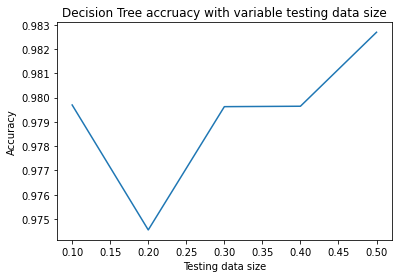

In [54]:
# variable size of the test dataset
test_list=[0.5, 0.4, 0.3, 0.2, 0.1]
acc=[]

#train model on various train/test sets and record the accuracies
for num in test_list:    

    #split the dataset according to the value in the list
    X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=num, random_state=1)

    #create a new model object
    DT = DecisionTreeClassifier(criterion='entropy')

    #train the model on the train data
    DT.fit(X_train,y_train)
    
    #predict the values, test data input
    DTPredict = DT.predict(X_test)

    #evaluate the accuracy of the model
    Accuracy = metrics.accuracy_score(y_test,DTPredict)

    #save the accuracy of the model
    acc.append(Accuracy)

    print("Accuracy of the Decision Tree Classifier at test data-",num,": ",Accuracy)

#plot the graph - accuracy against the test-data size
plt.plot(test_list, acc) 
plt.xlabel('Testing data size') 
plt.ylabel('Accuracy') 
plt.title('Decision Tree accruacy with variable testing data size') 
plt.show() 

In [55]:
#split the data in the hightest accuracy
X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=0.1, random_state=1) # 10% training and 50% test

#display a record value from the test set
# print(X_test.iloc[0])

In [56]:
#train the model
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)

#make predictions
DTPredict = DT.predict(X_test)

#note the accuracy and ROC score
Accuracy = metrics.accuracy_score(y_test,DTPredict)
print("Accuracy of the Decision Tree Classifier : ",round(Accuracy,2))

Accuracy of the Decision Tree Classifier :  0.98


# Testing sample profiles on the trained models

In [57]:
#get the sample output separated
sample_y=samples['Status']

#print the values from the sample output
# print("Classes of the sample profiles :")
# print(sample_y)

In [58]:
#remove the status attribute from the sample profiles
samples = samples.drop('Status', axis=1)

#display the remaining attributes
print("Remaining attributes of the sample profiles :")
print(samples.columns)

Remaining attributes of the sample profiles :
Index(['Amount Requested', 'Interest Rate', 'Loan Length', 'Monthly PAYMENT',
       'Debt-To-Income Ratio', 'Remaining Principal ', ' Payments To Date',
       'Monthly Income', 'Open CREDIT Lines', 'Total CREDIT Lines',
       'Revolving CREDIT Balance', 'Revolving Line Utilization'],
      dtype='object')


In [59]:
prediction = DT.predict(samples)
prediction

array([0, 0, 0, 0, 0], dtype=int64)

In [60]:
#print the prediction output
for i in range(samples.shape[0]):
    prediction = DT.predict(samples)
    if prediction[i]==0:
        prediction="Fully Paid"
    elif prediction[i]==1:
        prediction = "Current"
    elif prediction[i]==2:
        prediction = "Charged Off"
  
   
    print("\nPredicted class: ",prediction)


#     #print the actual class value
#     if sample_y.iloc[i]==0:
#         print("Actual class label : Fully paid")
#     elif sample_y.iloc[i]==1:
#         print("Actual class label : Current")
#     elif sample_y.iloc[i]==2:
#         print("Actual class label : Charged Off")
   



Predicted class:  Fully Paid

Predicted class:  Fully Paid

Predicted class:  Fully Paid

Predicted class:  Fully Paid

Predicted class:  Fully Paid


# Data Analysis

## Yearwise number of loans

In [61]:
#obtain data before normalization
data=data_copy

#display the date range
print("Minimum Issued date : ",data['Issued Date'].min())
print("Maximum Issued date : ",data['Issued Date'].max())

#convert the date into year
data['Issued_year']=data['Issued Date'].dt.year

#print the example values
print("\nYearwise record count : ")
print(data['Issued_year'].value_counts())

Minimum Issued date :  2007-06-27 00:00:00
Maximum Issued date :  2009-01-29 00:00:00

Yearwise record count : 
2008    1536
2007     249
2009     183
Name: Issued_year, dtype: int64


In [62]:
#make yearwise groups and print the record count

year_groups = data.groupby(['Issued_year'])
y=[]
c=[]
for year, yr_data in year_groups:
    y.append(year)
    c.append(yr_data.shape[0])
    print(year,end=' : ')
    print(yr_data.shape[0])

2007 : 249
2008 : 1536
2009 : 183


Text(0.5, 1.0, 'Issued_year counts')

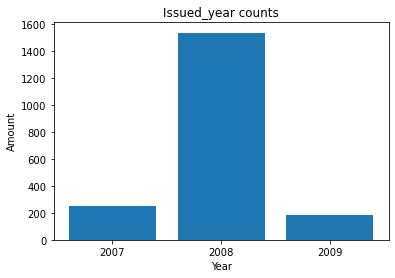

In [63]:
#print bar chart
plt.bar(y,c)
plt.xticks(range(min(y),max(y)+1,1))
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Issued_year counts')

## States/cities that have the most fully paid and charged off applicants

In [64]:
#print the total number of applicants
total_rec = data.shape[0]
print("Total applicants : ", total_rec)

#make state-wise groups from the dataset
state_groups = data.groupby(['State'])

st=[]
fp=[]
co=[]
ta=[]
cu=[]

#for each state group
for state, st_group in state_groups:
    #calculate the group size
    state_rec = st_group.shape[0]
    
    #calculate the percentage of the applicants from this state
    state_per = state_rec/total_rec*100
    ta.append(state_per)
    fp.append(st_group.loc[(st_group['Status'] ==0)].shape[0]/total_rec*100)
    cu.append(st_group.loc[(st_group['Status'] ==1)].shape[0]/total_rec*100)
    
    co.append(st_group.loc[(st_group['Status'] ==2)].shape[0]/total_rec*100)
 

    st.append(state)


Total applicants :  1968


In [65]:
#create a new dataframe to show the applicant percentage

app_count = pd.DataFrame()

#create new attributes
app_count['State_name']=st
app_count['Total_applicants%']=ta
app_count['Fully_paid%']=fp
app_count['Charged_off%']=co
app_count['Current%']=cu
#display the sorted valued based on the total applicants
print(app_count.sort_values(['Total_applicants%'], ascending=False))


   State_name  Total_applicants%  Fully_paid%  Charged_off%  Current%
4          CA          18.394309    11.077236      3.404472  3.912602
33         NY           9.298780     7.266260      1.168699  0.863821
9          FL           6.656504     3.556911      2.235772  0.863821
42         TX           6.148374     4.827236      0.508130  0.813008
30         NJ           4.420732     3.099593      0.813008  0.508130
44         VA           3.963415     3.150407      0.355691  0.457317
10         GA           3.810976     2.439024      0.711382  0.660569
19         MA           3.760163     2.947154      0.152439  0.660569
14         IL           3.252033     2.134146      0.508130  0.609756
34         OH           2.896341     1.930894      0.203252  0.762195
5          CO           2.794715     1.930894      0.508130  0.355691
20         MD           2.693089     1.930894      0.406504  0.355691
37         PA           2.591463     2.032520      0.304878  0.254065
3          AZ       

## Earliest Credit Line analysis

In [66]:
print("Example values of the attribute : ")
print(data["Earliest CREDIT Line"])

Example values of the attribute : 
0      2003-10-27
1      1988-11-19
2      1998-10-28
3      1986-12-30
4      1990-11-11
          ...    
1995   1991-04-20
1996   1994-05-04
1997   1990-08-23
1998   1995-04-29
1999   1996-11-19
Name: Earliest CREDIT Line, Length: 1968, dtype: datetime64[ns]


In [67]:
#convert the date into decade
data['Earliest CREDIT Line'] = pd.to_datetime(data['Earliest CREDIT Line'])
data['ECLD'] = data["Earliest CREDIT Line"].dt.year
print(data["ECLD"])

0       2003
1       1988
2       1998
3       1986
4       1990
        ... 
1995    1991
1996    1994
1997    1990
1998    1995
1999    1996
Name: ECLD, Length: 1968, dtype: int64


Text(0.5, 1.0, 'Earliest Credit Line counts')

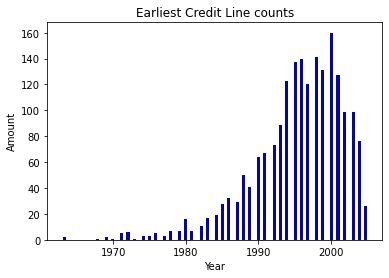

In [68]:
#convert the attribute values in list
dec_list = list(data["ECLD"])

#print histogram
n, bins, patches = plt.hist(x=dec_list, bins=100, color='#0504aa')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Earliest Credit Line counts')

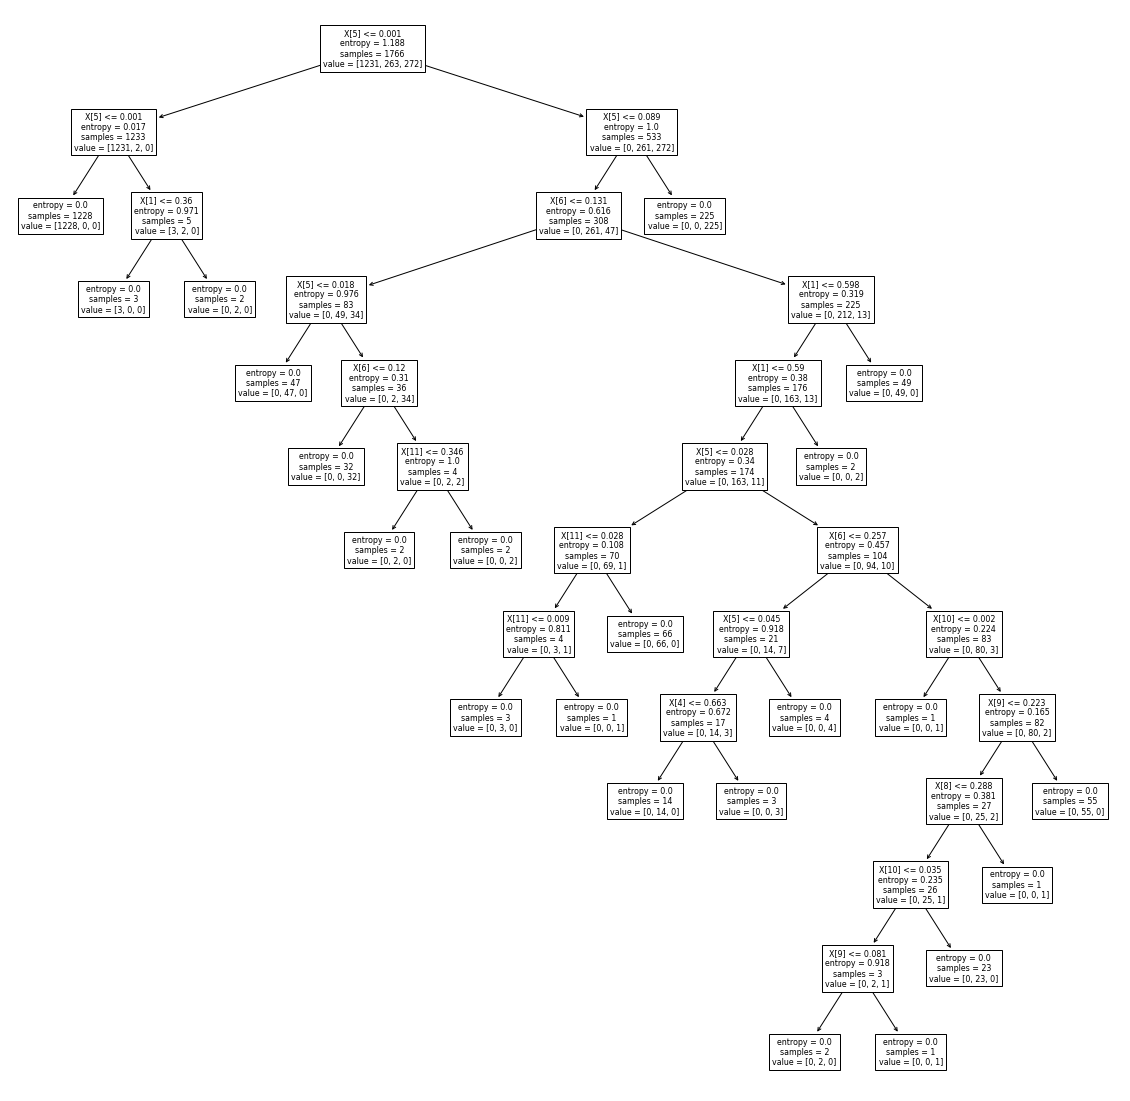

In [70]:
#Visualizing Decision Trees
plt.figure(figsize=(20,20))
tree.plot_tree(DT);